In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
from keras.datasets import mnist
from keras.models import Sequential,load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [113]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

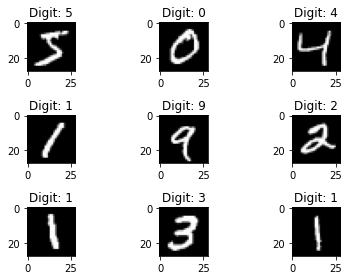

In [114]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i],cmap='gray')
    # f-strings => Python 3.6 added new string interpolation method
    plt.title(f'Digit: {y_train[i]}')    

Text(0.5, 1.0, 'Pixel Value Distribution')

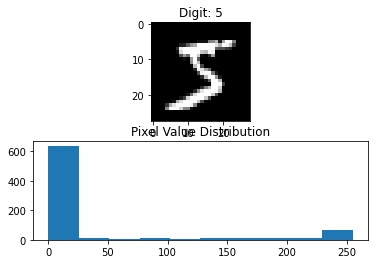

In [115]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0],cmap='gray')
plt.title(f'Digit: {y_train[0]}')
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

In [116]:
X_train = X_train.reshape(60000,784)

In [117]:
X_test = X_test.reshape(10000, 784)

In [118]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [119]:
print(np.unique(y_train,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [120]:
# one-hot encoding
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
Y_test.shape

(10000, 10)

In [121]:
# building model (linear stack of layers)
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [122]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [123]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20,
          verbose=2, validation_data=(X_test, Y_test))

# saving the model if needed
# save_dir = "/results/"
# model_name = 'keras_mnist.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

Epoch 1/20
469/469 - 6s - loss: 0.2485 - accuracy: 0.9252 - val_loss: 0.1243 - val_accuracy: 0.9610 - 6s/epoch - 13ms/step
Epoch 2/20
469/469 - 6s - loss: 0.1020 - accuracy: 0.9688 - val_loss: 0.0799 - val_accuracy: 0.9757 - 6s/epoch - 13ms/step
Epoch 3/20
469/469 - 6s - loss: 0.0694 - accuracy: 0.9783 - val_loss: 0.0702 - val_accuracy: 0.9783 - 6s/epoch - 13ms/step
Epoch 4/20
469/469 - 6s - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0674 - val_accuracy: 0.9795 - 6s/epoch - 12ms/step
Epoch 5/20
469/469 - 6s - loss: 0.0462 - accuracy: 0.9847 - val_loss: 0.0671 - val_accuracy: 0.9803 - 6s/epoch - 12ms/step
Epoch 6/20
469/469 - 6s - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0633 - val_accuracy: 0.9821 - 6s/epoch - 12ms/step
Epoch 7/20
469/469 - 6s - loss: 0.0334 - accuracy: 0.9885 - val_loss: 0.0733 - val_accuracy: 0.9808 - 6s/epoch - 12ms/step
Epoch 8/20
469/469 - 6s - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0607 - val_accuracy: 0.9830 - 6s/epoch - 12ms/step
Epoch 9/20
469/4

In [124]:
history.history

{'loss': [0.2484636753797531,
  0.10200456529855728,
  0.06939679384231567,
  0.05526743456721306,
  0.04622504860162735,
  0.03801600635051727,
  0.03337268903851509,
  0.03362683206796646,
  0.024871826171875,
  0.02453634887933731,
  0.024681512266397476,
  0.023388193920254707,
  0.022776059806346893,
  0.0180487260222435,
  0.015664830803871155,
  0.018027128651738167,
  0.019084284082055092,
  0.017341431230306625,
  0.01607947051525116,
  0.013028115965425968],
 'accuracy': [0.9251999855041504,
  0.9687666893005371,
  0.9782500267028809,
  0.9826499819755554,
  0.984666645526886,
  0.9879666566848755,
  0.9884999990463257,
  0.9888499975204468,
  0.9917833209037781,
  0.9922833442687988,
  0.9915000200271606,
  0.9921833276748657,
  0.9925500154495239,
  0.9938166737556458,
  0.9944833517074585,
  0.9935666918754578,
  0.9935333132743835,
  0.9946333169937134,
  0.9948499798774719,
  0.9959166646003723],
 'val_loss': [0.12426375597715378,
  0.07987819612026215,
  0.0702487379312

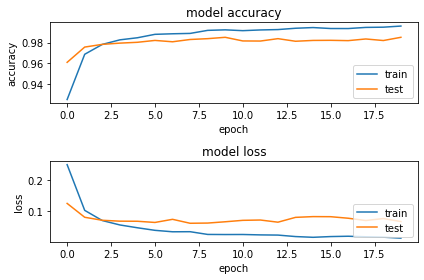

In [125]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train', 'test'], loc='lower right')

plt.tight_layout()

In [126]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0662 - accuracy: 0.9851 - 891ms/epoch - 3ms/step
Test Loss 0.06617222726345062
Test Accuracy 0.9850999712944031


In [136]:
predicted = model.predict(X_test)

In [138]:
predicted_class = np.argmax(predicted,axis=1)

In [140]:
predicted_class

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [151]:
correct_indices = np.nonzero(predicted_class == y_test)[0]
incorrect_indices = np.nonzero(predicted_class != y_test)[0]

In [152]:
print(f'Classified Correctly: {len(correct_indices)}')
print(f'Classified Incorrectly: {len(incorrect_indices)}')

Classified Correctly: 9851
Classified Incorrectly: 149


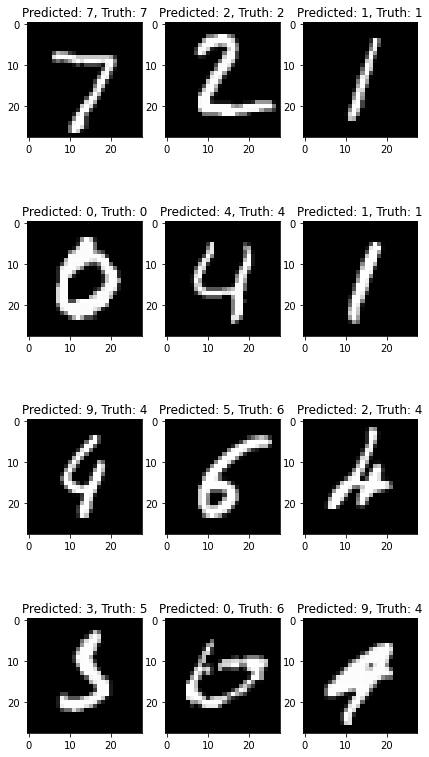

In [180]:
figure_evaluation = plt.figure()
plt.tight_layout()
# 6 correct predictions
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f'Predicted: {predicted_class[correct]}, Truth: {y_test[correct]}')
    
# 6 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(4,3,i+7)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f'Predicted: {predicted_class[incorrect]}, Truth: {y_test[incorrect]}')